In [1]:
import sys, os, importlib
sys.path.insert(0, os.path.abspath(".."))

from src import data as data_mod
importlib.reload(data_mod)
from src.data import get_prices

tickers = ["AAPL","MSFT","SPY"]
prices = get_prices(tickers, start="2020-01-01", end="2024-12-31", cache_csv="../data/prices.csv")
prices.tail(), prices.isna().sum().sum(), prices.shape


(Ticker            AAPL        MSFT         SPY
 Date                                          
 2024-12-23  254.367020  432.871429  589.524353
 2024-12-24  257.286682  436.929108  596.076904
 2024-12-26  258.103729  435.715790  596.116699
 2024-12-27  254.685867  428.177216  589.841614
 2024-12-30  251.307877  422.508362  583.110535,
 np.int64(0),
 (1257, 3))

In [3]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(0, os.path.abspath(".."))

from src.data import get_prices
from src.metrics import compute_returns, equal_weighted_portfolio, cumulative_growth, summarize_metrics
from src.plots import plot_cumulative, plot_hist, plot_drawdown

tickers = ["AAPL","MSFT","SPY"]
prices  = get_prices(tickers, start="2020-01-01", end="2024-12-31", cache_csv="../data/prices.csv")
prices.tail(), prices.shape


(Ticker            AAPL        MSFT         SPY
 Date                                          
 2024-12-23  254.367020  432.871429  589.524353
 2024-12-24  257.286682  436.929108  596.076904
 2024-12-26  258.103729  435.715790  596.116699
 2024-12-27  254.685867  428.177216  589.841614
 2024-12-30  251.307877  422.508362  583.110535,
 (1257, 3))

In [4]:
rets = compute_returns(prices)          # rendements quotidiens
port = equal_weighted_portfolio(rets)   # moyenne des colonnes chaque jour
assert rets.isna().sum().sum() == 0, "NA restants dans returns"
rets.shape, port.shape


((1256, 3), (1256,))

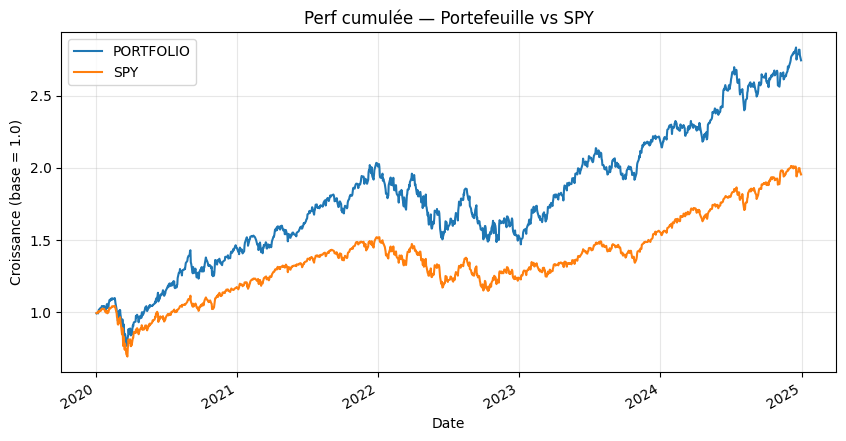

In [5]:
cum_assets = cumulative_growth(rets)                 
cum_port   = cumulative_growth(port).rename("PORTFOLIO")
cum        = cum_assets.join(cum_port)

plot_cumulative(
    cum[["PORTFOLIO","SPY"]],
    title="Perf cumulée — Portefeuille vs SPY",
    save_as="../outputs/perf_cum.png",
)


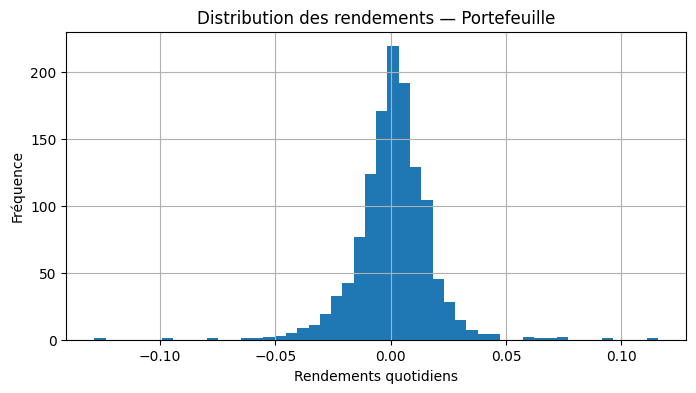

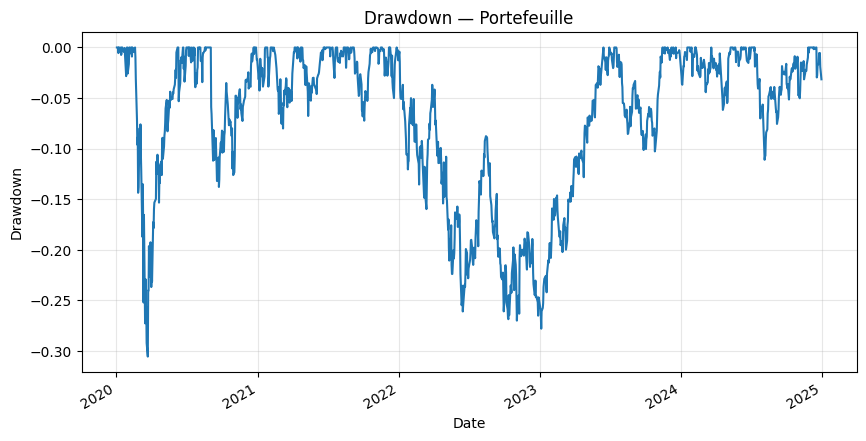

In [6]:
plot_hist(port, title="Distribution des rendements — Portefeuille", save_as="../outputs/hist_port.png")
_ = plot_drawdown(port, title="Drawdown — Portefeuille", save_as="../outputs/drawdown_port.png")


In [8]:
table = summarize_metrics(rets, portfolio=port, rf_annual=0.00)  # Rf=0% en V1
display(table.style.format({
    "CumulativeReturn": "{:.2%}",
    "AnnVol":           "{:.2%}",
    "Sharpe":           "{:.2f}",
    "MaxDrawdown":      "{:.2%}",
}))
table.to_excel("../outputs/metrics.xlsx", index=True)


,CumulativeReturn,AnnVol,Sharpe,MaxDrawdown
Ticker,,,,
AAPL,246.45%,31.69%,0.95,-31.43%
MSFT,176.53%,30.51%,0.82,-37.15%
SPY,95.30%,21.00%,0.75,-33.72%
PORTFOLIO,174.39%,25.66%,0.92,-30.55%
